In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_excel(r"C:\Users\Karan\Downloads\EastWestAirlines.xlsx",sheet_name="data")

In [4]:
df


,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
d_f=df.drop(['index',"Award?"],axis=1)

In [8]:
d_f

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [9]:
d_f.shape

(3999, 10)

In [10]:
d_f[d_f.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3876,1000,0,1,1,1,0,0,0,0,1597


In [11]:
df_1=d_f.drop_duplicates()
df_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [12]:
df_1[df_1.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


In [13]:
df_1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [14]:
#from sklearn.preprocessing import StandardScaler
#stdscaler=StandardScaler()
#x=stdscaler.fit_transform(df_1) Standard Scalar is applied on Columns, while Normalizer is applied on rows

In [15]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x) #while Normalizer is applied on rows

In [16]:
norm_df=norm_func(df_1)
norm_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [17]:
#x

# herirchical clustering

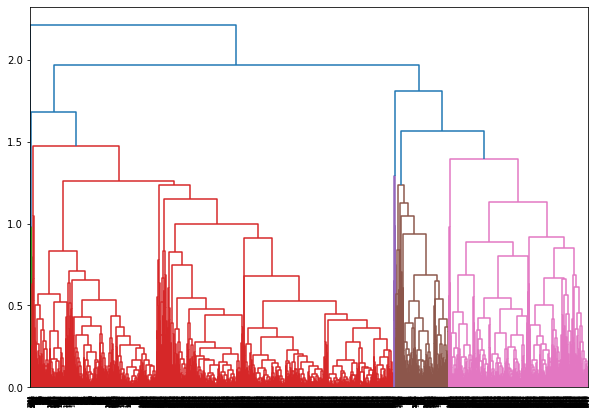

In [18]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(norm_df,method='complete'))

In [64]:
#create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
#from above dendogram we have got n_clusters=3

In [65]:
y_hc=hc.fit_predict(norm_df)

In [66]:
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [67]:
df_1["h_clust"]=y_hc

C:\Users\Abc\AppData\Local\Temp\ipykernel_6796\3369651905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["h_clust"]=y_hc


In [68]:
df_1


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [69]:
df_1["h_clust"].info

<bound method Series.info of 0       2
1       2
2       2
3       2
4       0
       ..
3994    2
3995    2
3996    0
3997    2
3998    2
Name: h_clust, Length: 3998, dtype: int64>

<AxesSubplot:>

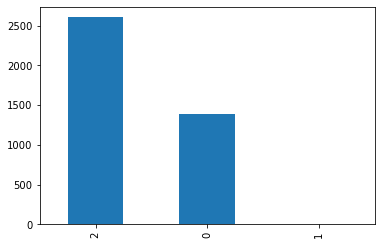

In [70]:
df_1["h_clust"].value_counts().plot(kind="bar")

In [71]:
from sklearn  import metrics
metrics.silhouette_score(norm_df,y_hc,metric="euclidean")

0.40397153416919296

# k means

In [48]:
df_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df_1)

KMeans(n_clusters=2)

In [74]:
kmeans.cluster_centers_

array([[5.13700191e+04, 1.26327243e+02, 1.96836651e+00, 1.01499864e+00,
        1.01254431e+00, 1.49807254e+04, 1.09394600e+01, 3.89664849e+02,
        1.15107717e+00, 4.00227298e+03, 1.34633215e+00],
       [3.20111326e+05, 3.41607251e+02, 3.07250755e+00, 1.00906344e+00,
        1.00906344e+00, 4.11719637e+04, 1.89758308e+01, 1.24127492e+03,
        3.84290030e+00, 5.41446224e+03, 8.30815710e-01]])

In [75]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
kmeans.inertia_

20820865884960.066

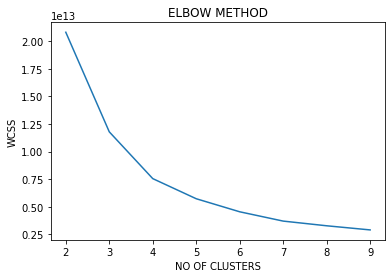

In [77]:
wcss=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,10),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()

In [79]:
#from above we get elbow point at 4i.e k value(no.of clusters)=4
from sklearn.cluster import KMeans
clust_new=KMeans(3)
clust_new.fit(norm_df)


KMeans(n_clusters=3)

In [80]:
clust_new.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [81]:
clust_new.n_iter_

5

In [82]:
clust_new.inertia_

331.41701574357165

In [86]:
#assign clusters to data set
df_1["kmeans"]=clust_new.labels_#used to add column to dataset

C:\Users\Abc\AppData\Local\Temp\ipykernel_6796\3937010870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["kmeans"]=clust_new.labels_#used to add column to dataset


In [91]:
df_2=df_1.drop(["clusterd_kmeans"],axis=1)
df_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust,kmeans
0,28143,0,1,1,1,174,1,0,0,7000,2,0
1,19244,0,1,1,1,215,2,0,0,6968,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,2,0
3,14776,0,1,1,1,500,1,0,0,6952,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,2,2


<AxesSubplot:>

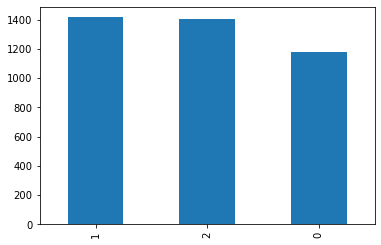

In [92]:
df_2["kmeans"].value_counts().plot(kind="bar")

In [94]:
from sklearn.cluster import DBSCAN

# DBSCAN

In [150]:
#building the model
dbscan=DBSCAN(eps=5,min_samples=13)#min samples=dimensions+1 i.e in this dataset we have 6 dimensions so we take 12+1=13
dbscan.fit(norm_df)

DBSCAN(eps=5, min_samples=13)

In [151]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
df_2["dbscan"]=dbscan.labels_

In [153]:
df_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clust,kmeans,dbscan
0,28143,0,1,1,1,174,1,0,0,7000,2,0,0
1,19244,0,1,1,1,215,2,0,0,6968,2,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,2,0,0
3,14776,0,1,1,1,500,1,0,0,6952,2,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,2,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,2,2,0


<AxesSubplot:>

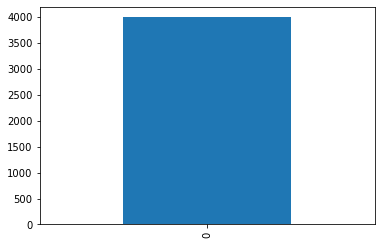

In [154]:
df_2["dbscan"].value_counts().plot(kind="bar")